<a href="https://colab.research.google.com/github/sakira/TensorflowInPractice/blob/master/DNN_in_Tensorflow_Course1_Week3_Ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 3
In the videos you looked at how you would improve Fashion MNIST using Convolutions. For your exercise see if you can improve MNIST to 99.8% accuracy or more using only a single convolutional layer and a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. It should happen in less than 20 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your layers.

I've started the code for you -- you need to finish it!

When 99.8% accuracy has been hit, you should print out the string "Reached 99.8% accuracy so cancelling training!"


In [2]:
%tensorflow_version 1.x
import tensorflow as tf

# YOUR CODE STARTS HERE

# YOUR CODE ENDS HERE

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# YOUR CODE STARTS HERE
# Reshape
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)
# Normalize
training_images = training_images / 255.0
test_images = test_images / 255.0
# YOUR CODE ENDS HERE

model = tf.keras.models.Sequential([
    # YOUR CODE STARTS HERE
    # Adding convolutional layers
    # 1st convolutional layers add 64 filters
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 2nd convolutional layers
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Same as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    # YOUR CODE ENDS HERE
])

# YOUR CODE STARTS HERE
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
# YOUR CODE ENDS HERE



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

[0.03066501966859869, 0.9899]

## **Visualize**

In [3]:
print(test_labels[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


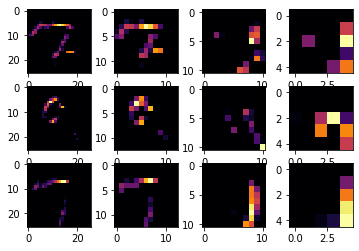

In [8]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3, 4)
FIRST_IMAGE = 36
SECOND_IMAGE = 7
THIRD_IMAGE = 26

CONVOLUTIONAL_NUMBER = 4

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs=layer_outputs)

for x in range(0, 4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]

  axarr[0, x].imshow(f1[0, :, :, CONVOLUTIONAL_NUMBER], cmap='inferno')
  axarr[0, x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]

  axarr[1, x].imshow(f2[0, :, :, CONVOLUTIONAL_NUMBER], cmap='inferno')
  axarr[1, x].grid(False)

  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]

  axarr[2, x].imshow(f3[0, :, :, CONVOLUTIONAL_NUMBER], cmap='inferno')
  axarr[2, x].grid(False)

## **Walking through convolutions**

In [0]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

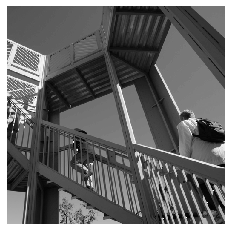

In [10]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [12]:
i_transformed = np.copy(i)
size_x, size_y = i_transformed.shape
size_x, size_y

(512, 512)

In [0]:
filter = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
weight = 1


In [0]:
for x in range(1, size_x - 1):
  for y in range(1, size_y - 1):
    convolution = 0.0
    convolution += (i[x - 1, y - 1] * filter[0][0])
    convolution += (i[x, y - 1] * filter[0][1])
    convolution += (i[x + 1, y - 1] * filter[0][2])

    convolution += (i[x - 1, y] * filter[1][0])
    convolution += (i[x, y] * filter[1][1])
    convolution += (i[x + 1, y] * filter[1][2])

    convolution += (i[x - 1, y + 1] * filter[2][0])
    convolution += (i[x, y + 1] * filter[2][1])
    convolution += (i[x + 1, y + 1] * filter[2][2])

    convolution = convolution * weight
    if convolution < 0:
      convolution = 0
    if(convolution > 255):
      convolution = 255
    i_transformed[x, y] = convolution
    

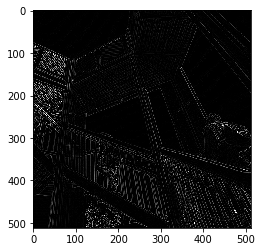

In [15]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()

## **POOLED VERSION**

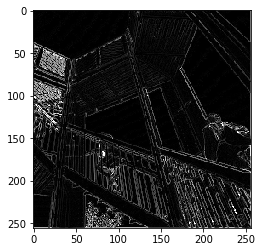

In [16]:

new_x = int(size_x/2)
new_y = int(size_y/2)

newImage = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x + 1, y])
    pixels.append(i_transformed[x, y + 1])
    pixels.append(i_transformed[x + 1, y + 1])
    pixels.sort(reverse=True)
    newImage[int(x/2), int(y/2)] = pixels[0]


plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()